## Netflix Case Study - 

## 1. Importing Libraries and Basic Observations

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Netflix.csv")

In [3]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
data.shape

(8807, 12)

In [5]:
# Data type - 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### The size of the given dataset is Rows = 8807 & Columns = 12

In [6]:
data.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### In the data it seen that show_id column and title column has unique values. Hence it can be concluded that  - Total 8807 movies/TV shows data is available in the dataset.

In [7]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


#### It seems that only single column has numerical values, and it shows release year of the content ranges between what timeframe. It means rest all the columns are having the categorical data.   

## 2. Data Cleaning 

#### Overall null values in each column of dataset

In [8]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
data.isna().sum().sum()

4307

In [10]:
data[data["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


#### It seems that there are 3 missing values in duration column, that values entered in rating column by mistake.

In [11]:
# Replacing the wrong entries in rating column


a = data[data["duration"].isna()].index
a

Int64Index([5541, 5794, 5813], dtype='int64')

In [12]:
data.loc[a] = data.loc[a].fillna(method = "ffill", axis = 1)

In [13]:
# Replacing wrong entries in rating column with "Not Available"

data.loc[a, "rating"] = "Not Available"

In [14]:
data.loc[a]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


In [15]:
# Null values in rating column fill with "Not Available"

data[data["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [16]:
b = data[data["rating"].isna()].index
b

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [17]:
data.loc[b, "rating"] = "Not Available"

In [18]:
data.loc[b]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [19]:
data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [20]:
data[data["date_added"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [21]:
data.drop(data.loc[data["date_added"].isna()].index, axis = 0, inplace = True)
data["date_added"].value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: date_added, Length: 1767, dtype: int64

In [22]:
# changing data type from object to datetime

data["date_added"] = pd.to_datetime(data["date_added"])
data["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

#### Dropped the null values from date_added column, and converted data type of date_added column from "object" to "datetime"

#### Adding the new columns "year_added" & "month_added" by extracting the year & month from 'date_added' column.

In [23]:
# Add year_added column

data["year_added"] = data["date_added"].dt.year

# Add month_added column

data["month_added"] = data["date_added"].dt.month

In [24]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


In [25]:
data[["date_added", "year_added", "month_added"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   year_added   8797 non-null   int64         
 2   month_added  8797 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 274.9 KB


In [26]:
data.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
year_added         0
month_added        0
dtype: int64

## 3.Non-Graphical Analysis

#### Types of content  in dataset.

In [27]:
data["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [28]:
movies = data.loc[data["type"] == "Movie"]
movies.duration.value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [29]:
tv_shows = data.loc[data["type"] == "TV Show"]
tv_shows.duration.value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

#### Movie and TV shows both have different format for duration, we can change duration for movies as minutes & TV shows as seasons

In [30]:
movies["duration"] = movies["duration"].str[:-3]
movies["duration"] = movies["duration"].astype("float")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\1416502109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration"] = movies["duration"].str[:-3]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\1416502109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration"] = movies["duration"].astype("float")


In [31]:
tv_shows["duration"] = tv_shows["duration"].str[:-7].apply(lambda x : x.strip())
tv_shows["duration"] = tv_shows["duration"].astype("float")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\2682526153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["duration"] = tv_shows["duration"].str[:-7].apply(lambda x : x.strip())
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\2682526153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["duration"] = tv_shows["duration"].astype("float")


In [32]:
tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\3956871887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.rename({'duration': 'duration_in_seasons'} ,axis = 1 , inplace = True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\3956871887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.rename({'duration': 'duration_in_minutes'} ,axis = 1 , inplace = True)


In [33]:
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_seasons,listed_in,description,year_added,month_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2.0,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1.0,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2.0,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1.0,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9


In [34]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration_in_minutes,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104.0,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127.0,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [35]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

In [36]:
tv_shows.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2666, dtype: float64

#### The first movie added on Netflix and most recent movie added on Netflix.

In [37]:
first_movie = pd.Series((data["date_added"].min().strftime("%B %Y")))
first_movie

0    January 2008
dtype: object

In [38]:
recent_movie = pd.Series((data["date_added"].max().strftime("%B %Y")))
recent_movie

0    September 2021
dtype: object

#### In which year the oldest and the most recent movie/TV show relased on the Netflix.

In [39]:
oldest = data["release_year"].min()
oldest

1925

In [40]:
recent = data["release_year"].max()
recent

2021

 #### Different types of ratings available on Netflix  and the number of content released in each type.

In [41]:
data.groupby(["type", "rating"])["show_id"].count()

type     rating       
Movie    G                  41
         NC-17               3
         NR                 75
         Not Available       5
         PG                287
         PG-13             490
         R                 797
         TV-14            1427
         TV-G              126
         TV-MA            2062
         TV-PG             540
         TV-Y              131
         TV-Y7             139
         TV-Y7-FV            5
         UR                  3
TV Show  NR                  4
         Not Available       2
         R                   2
         TV-14             730
         TV-G               94
         TV-MA            1143
         TV-PG             321
         TV-Y              175
         TV-Y7             194
         TV-Y7-FV            1
Name: show_id, dtype: int64

 ####   Country Column

In [42]:
data["country"].value_counts()

United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

It seems that many movies are produced in more than 1 country. Hence, the country column has comma separated values of countries.It's difficult to analyse how many movies were produced in each country. We can split the country column into different rows.

In [43]:
# drop the null values - 

ctry = data[["show_id", "type", "country"]]
ctry.dropna(inplace = True)
ctry


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\4128015838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctry.dropna(inplace = True)


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,"United States, Ghana, Burkina Faso, United Kin..."
8,s9,TV Show,United Kingdom
...,...,...,...
8801,s8802,Movie,"United Arab Emirates, Jordan"
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [44]:
# split the countries by comma - 

ctry["country"] = ctry["country"].apply(lambda x : x.split(","))
ctry = ctry.explode("country")
ctry

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\398481476.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctry["country"] = ctry["country"].apply(lambda x : x.split(","))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [45]:
 # Remove the empty strings values
    
ctry["conuntry"] = ctry["country"].str.strip()

In [46]:
ctry.loc[ctry["country"] == ""]

,show_id,type,country,conuntry
193,s194,TV Show,,
365,s366,Movie,,
1192,s1193,Movie,,
2224,s2225,Movie,,
4653,s4654,Movie,,
5925,s5926,Movie,,
7007,s7008,Movie,,


In [47]:
ctry = ctry.loc[ctry["country"] != ""]
ctry["country"].nunique()

196

#### There are movies from 196 conutries.

#### Total movies and tv shows in each country-

In [48]:
total = ctry.groupby(["country", "type"])["show_id"].count().reset_index()
total.pivot(index = ["country"], columns = "type", values = "show_id").sort_values("Movie", ascending = False)


type,Movie,TV Show
country,,
United States,2364.0,841.0
India,927.0,81.0
United States,388.0,91.0
United Kingdom,382.0,245.0
Canada,187.0,84.0
...,...,...
Jordan,NaN,2.0
Luxembourg,NaN,1.0
Puerto Rico,NaN,1.0


### Director Column 

In [49]:
data["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [50]:
drt = data[["show_id", "type", "director"]]
drt.dropna(inplace = True)
drt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\1623258490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drt.dropna(inplace = True)


,show_id,type,director
0,s1,Movie,Kirsten Johnson
2,s3,TV Show,Julien Leclercq
5,s6,TV Show,Mike Flanagan
6,s7,Movie,"Robert Cullen, José Luis Ucha"
7,s8,Movie,Haile Gerima
...,...,...,...
8801,s8802,Movie,Majid Al Ansari
8802,s8803,Movie,David Fincher
8804,s8805,Movie,Ruben Fleischer
8805,s8806,Movie,Peter Hewitt


In [51]:
drt["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [52]:
drt["director"].nunique()

4528

#### Total 4528 directors in the dataset.


#### Total movies and tv shows directed by each director-

In [53]:
total = drt.groupby(["director", "type"])["show_id"].count().reset_index()
total.pivot(index = ["director"], columns = "type", values = "show_id").sort_values("Movie", ascending = False)

type,Movie,TV Show
director,,
Rajiv Chilaka,19.0,NaN
"Raúl Campos, Jan Suter",18.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,1.0
Jay Karas,14.0,NaN
...,...,...
Vijay Roche,NaN,1.0
Vijay S. Bhanushali,NaN,1.0
"Vikramaditya Motwane, Anurag Kashyap",NaN,1.0


#### We can get details about genres from 'listed_in' column.


In [54]:
genre = data[["show_id", "type", "listed_in"]]
genre["listed_in"] = genre["listed_in"].apply(lambda x : x.split(","))
genre = genre.explode("listed_in")
genre

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\3896234191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre["listed_in"] = genre["listed_in"].apply(lambda x : x.split(","))


,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows
...,...,...,...
8805,s8806,Movie,Children & Family Movies
8805,s8806,Movie,Comedies
8806,s8807,Movie,Dramas
8806,s8807,Movie,International Movies


In [55]:
genre["listed_in"].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [56]:
genre["listed_in"].nunique()

73

#### There are total 73 genres in the dataset.

#### Total movies and TV shows in each genre - 

In [57]:
total = genre.groupby(["listed_in", "type"])["show_id"].count().reset_index()
total.pivot(index = "listed_in", columns = "type", values = "show_id").sort_index()

type,Movie,TV Show
listed_in,,
Anime Features,50.0,NaN
Children & Family Movies,36.0,NaN
Classic & Cult TV,NaN,6.0
Classic Movies,36.0,NaN
Comedies,464.0,NaN
...,...,...
TV Dramas,NaN,67.0
TV Horror,NaN,11.0
TV Sci-Fi & Fantasy,NaN,1.0


#### Cast Column

In [58]:
cast = data[["show_id", "type", "cast"]]
cast.dropna(inplace = True)
cast

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\2205502739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast.dropna(inplace = True)


,show_id,type,cast
1,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,s3,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,s5,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,s6,TV Show,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,s7,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
...,...,...,...
8801,s8802,Movie,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,s8803,Movie,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,s8805,Movie,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,s8806,Movie,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [59]:
cast["cast"] = cast["cast"].apply(lambda x : x.split(","))
cast = cast.explode("cast")
cast

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15536\2009803672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast["cast"] = cast["cast"].apply(lambda x : x.split(","))


,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [60]:
cast["cast"].nunique()

39260

#### There are total 39260 actors.

#### Total movies and TV shows by each actor - 

In [61]:
total = cast.groupby(["cast","type"])["show_id"].count().reset_index()
total.pivot(index = "cast", columns = "type", values = "show_id").sort_values("Movie", ascending = False)

type,Movie,TV Show
cast,,
Anupam Kher,38.0,1.0
Om Puri,27.0,NaN
Rupa Bhimani,27.0,4.0
Shah Rukh Khan,26.0,NaN
Paresh Rawal,25.0,NaN
...,...,...
Zoe Tay,NaN,2.0
Zooey Deschanel,NaN,1.0
Öykü Karayel,NaN,1.0


## 4. Visual Analysis - Univariate & Bivariate

#### 1. Distribution of content across differner types

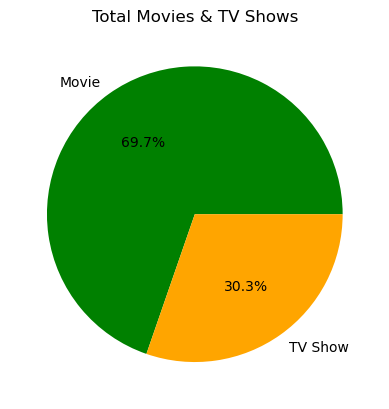

In [62]:
types = data.type.value_counts()
plt.pie(types, labels = types.index, autopct = "%1.1f%%", colors = ["green", "orange"])
plt.title("Total Movies & TV Shows")
plt.show()

It seems that in pie chart around 70% content is Movies and around 30% content is TV shows.

#### 2. Total Movies/TV Shows by each Director.

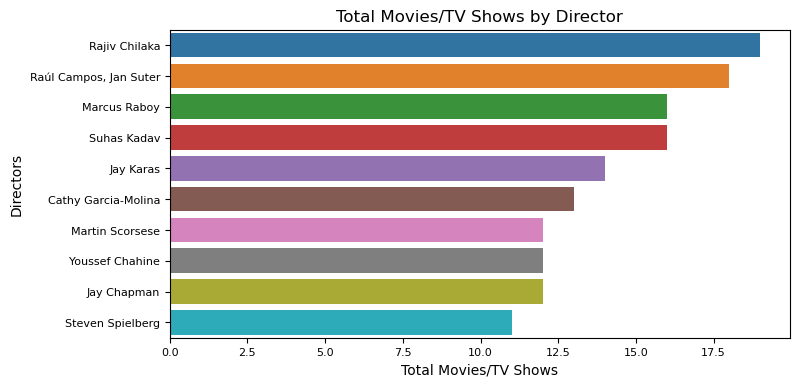

In [63]:
top = drt["director"].value_counts().head(10).index
data_new = drt.loc[drt["director"].isin(top)]

plt.figure(figsize = (8, 4))

sns.countplot(data = data_new, y ="director", order = top, orient = "v")

plt.xlabel("Total Movies/TV Shows", fontsize = 10)
plt.ylabel("Directors", fontsize = 10)

plt.xticks(fontsize = 8)
plt.yticks( fontsize = 8)

plt.title("Total Movies/TV Shows by Director", fontsize = 12)
plt.show()


#### 3. The number of Movies/TV shows added on Netflix per Year.

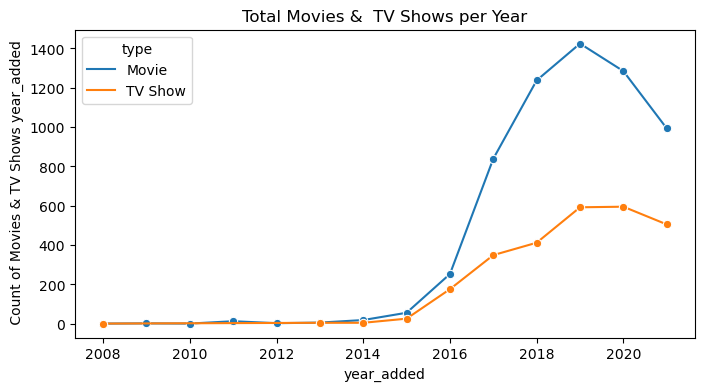

In [64]:
total = data.groupby(["year_added", "type"])["show_id"].count().reset_index()

total.rename({"show_id" : "Count of Movies/TV Shows"}, axis = 1, inplace = True)

plt.figure(figsize = (8, 4))

sns.lineplot(data = total, x = "year_added", y = "Count of Movies/TV Shows", hue = "type", marker = "o")

plt.xlabel("year_added", fontsize = 10)
plt.ylabel(" Count of Movies & TV Shows year_added", fontsize = 10)

plt.title("Total Movies &  TV Shows per Year", fontsize = 12)
plt.show()

Conclusion - 

1. After 2015 content added on Netflix surged drastically.
2. In the 2020 - 2021 seen that there is drop in the content added.
3. Highest Movies and TV shows added on Netlix in 2019.
4. As compare to Movies, TV shows not dropped drastically.

#### 4.Total Movies/TV Shows per Country

In [65]:
top = ctry.country.value_counts().head(10).index

data_new = ctry.loc[ctry["country"].isin(top)]

x = data_new.groupby(["country", "type"])["show_id"].count().reset_index()
x.pivot( index = "country", columns = "type", values = "show_id").sort_values("Movie", ascending = False)

type,Movie,TV Show
country,,
United States,2364,841
India,927,81
United States,388,91
United Kingdom,382,245
Canada,187,84
France,155,26
France,148,64
Spain,129,52
Japan,85,173


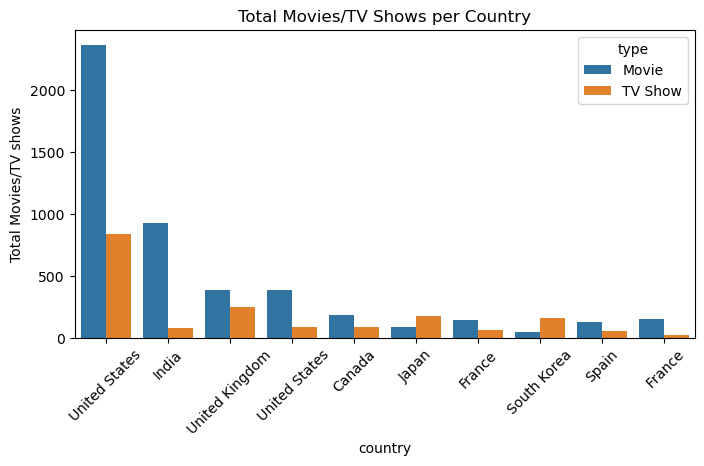

In [66]:
plt.figure(figsize = (8,4))

sns.countplot(data = data_new, x = "country", order = top, hue = "type")

plt.xticks(rotation = 45)
plt.ylabel("Total Movies/TV shows")
plt.title("Total Movies/TV Shows per Country")

plt.show()


#### 5.Total Movies/TV Shows in each Genre.

In [67]:
top_movies = genre[genre["type"] == "Movie"].listed_in.value_counts().head(10).index
data_movie = genre.loc[genre["listed_in"].isin(top_movies)]
data_movie

,show_id,type,listed_in
0,s1,Movie,Documentaries
6,s7,Movie,Children & Family Movies
7,s8,Movie,Dramas
7,s8,Movie,Independent Movies
7,s8,Movie,International Movies
...,...,...,...
8802,s8803,Movie,Thrillers
8804,s8805,Movie,Comedies
8805,s8806,Movie,Children & Family Movies
8806,s8807,Movie,Dramas


In [68]:
top_tv_shows = genre[genre["type"] == "TV Show"].listed_in.value_counts().head(10).index
data_tv = genre.loc[genre["listed_in"].isin(top_tv_shows)]
data_tv

,show_id,type,listed_in
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
2,s3,TV Show,Crime TV Shows
2,s3,TV Show,International TV Shows
3,s4,TV Show,Docuseries
...,...,...,...
8800,s8801,TV Show,International TV Shows
8800,s8801,TV Show,Romantic TV Shows
8800,s8801,TV Show,TV Dramas
8803,s8804,TV Show,Kids' TV


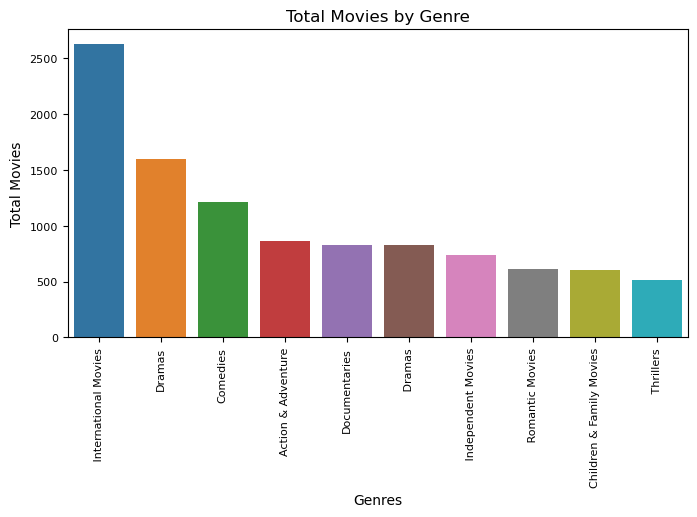

In [69]:
plt.figure(figsize = (8,4))
sns.countplot(data = data_movie, x = "listed_in", order = top_movies)
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("Genres", fontsize = 10)
plt.ylabel("Total Movies", fontsize = 10)
plt.title("Total Movies by Genre")
plt.show()

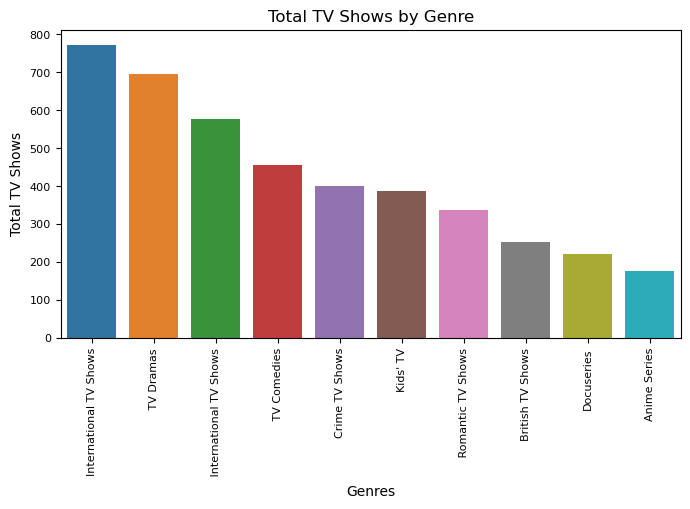

In [70]:
plt.figure(figsize = (8,4))
sns.countplot(data = data_tv, x = "listed_in", order = top_tv_shows)
plt.xticks(rotation = 90, fontsize = 8)
plt.yticks(fontsize = 8)
plt.xlabel("Genres", fontsize = 10)
plt.ylabel("Total TV Shows", fontsize = 10)
plt.title("Total TV Shows by Genre")
plt.show()

## 5.Bivariate Analysis 

#### 1.Variation in duration of movies by Release year

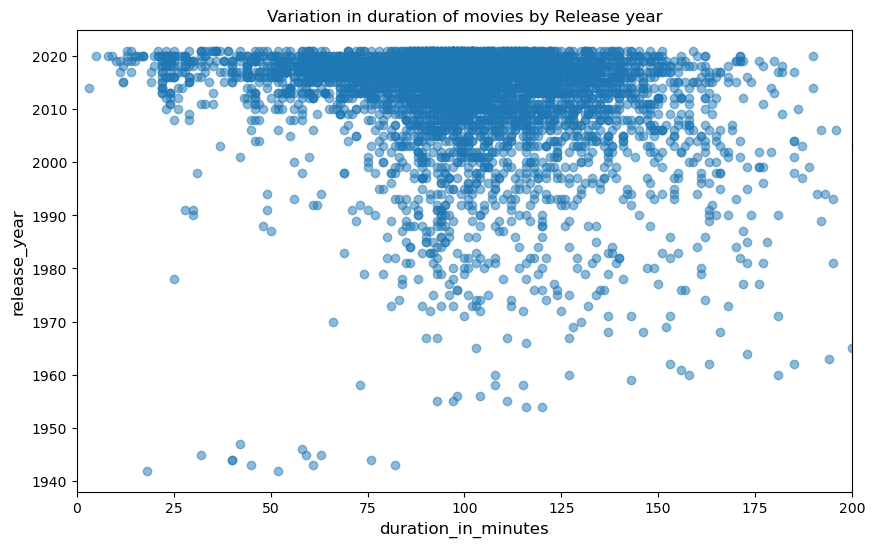

In [71]:
plt.figure(figsize = (10,6))
plt.scatter(movies["duration_in_minutes"], movies["release_year"], alpha = 0.5)

plt.xlabel("duration_in_minutes", fontsize = 12)
plt.ylabel("release_year",fontsize = 12)

plt.title("Variation in duration of movies by Release year")

plt.xlim(0,200)
plt.show()

Conclusion - 
1. Movies shorter than 150 minutes duration have increased drastically after 2000 & that are not much popular.
2. Short movies have been popular in last 10 years.

#### 2. Time when maximum content added on the Netflix.

In [72]:
month_year = data.groupby(["year_added", "month_added"])["show_id"].count().reset_index()

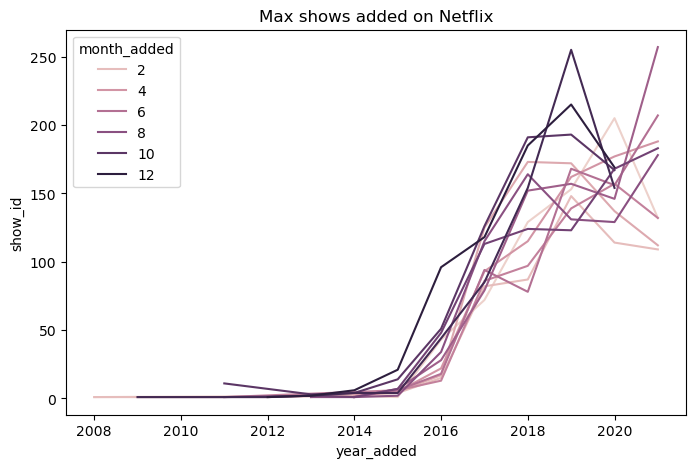

In [73]:
plt.figure(figsize = (8, 5))

sns.lineplot(data = month_year, x = "year_added", y = "show_id", hue = "month_added")

plt.title("Max shows added on Netflix")
plt.show()

Conclusion - 

1. Shows getting added on Netflix is increasing with each year until 2020.
2. Oct-Dec have more shows being added than the other months of the year.

####  3. The countries  which has added more number of content over the time.

In [74]:
country_list = ctry.country.value_counts().head(10).index

In [75]:
top_10_countries = ctry.loc[ctry["country"].isin(country_list)]
country_year = top_10_countries.merge(data, on = "show_id")[["show_id", "country_x", "type_x", "year_added"]]
country_year.columns = ["show_id", "country", "type", "year_added"]
country_year = country_year.groupby(["country", "year_added"])["show_id"].count().reset_index()

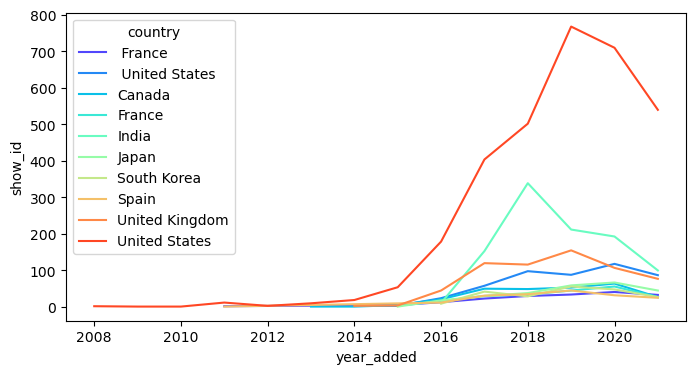

In [76]:
plt.figure(figsize =(8,4))

sns.lineplot(data = country_year, x = "year_added", y = "show_id", hue = "country", palette = "rainbow")


plt.show()

Conclusion -
1. United Stated have added highset number of movies/TV shows over the time. 
2. Since 2016, India has seen spike in popularity of content and added more number of content, followed by United Kingdom at 3rd    position.

#### 4.Popular genres in top 20 countries


In [84]:
top_20_country = ctry.country.value_counts().head(20).index
top_20_country = ctry.loc[ctry["country"].isin(top_20_country)]


In [82]:
x = top_20_country.merge(genre, on = "show_id").drop_duplicates()
country_genre = x.groupby(["country", "listed_in"])["show_id"].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = "listed_in", columns = "country", values = "show_id")


Text(0.5, 1.0, 'Countries V/s Genres')

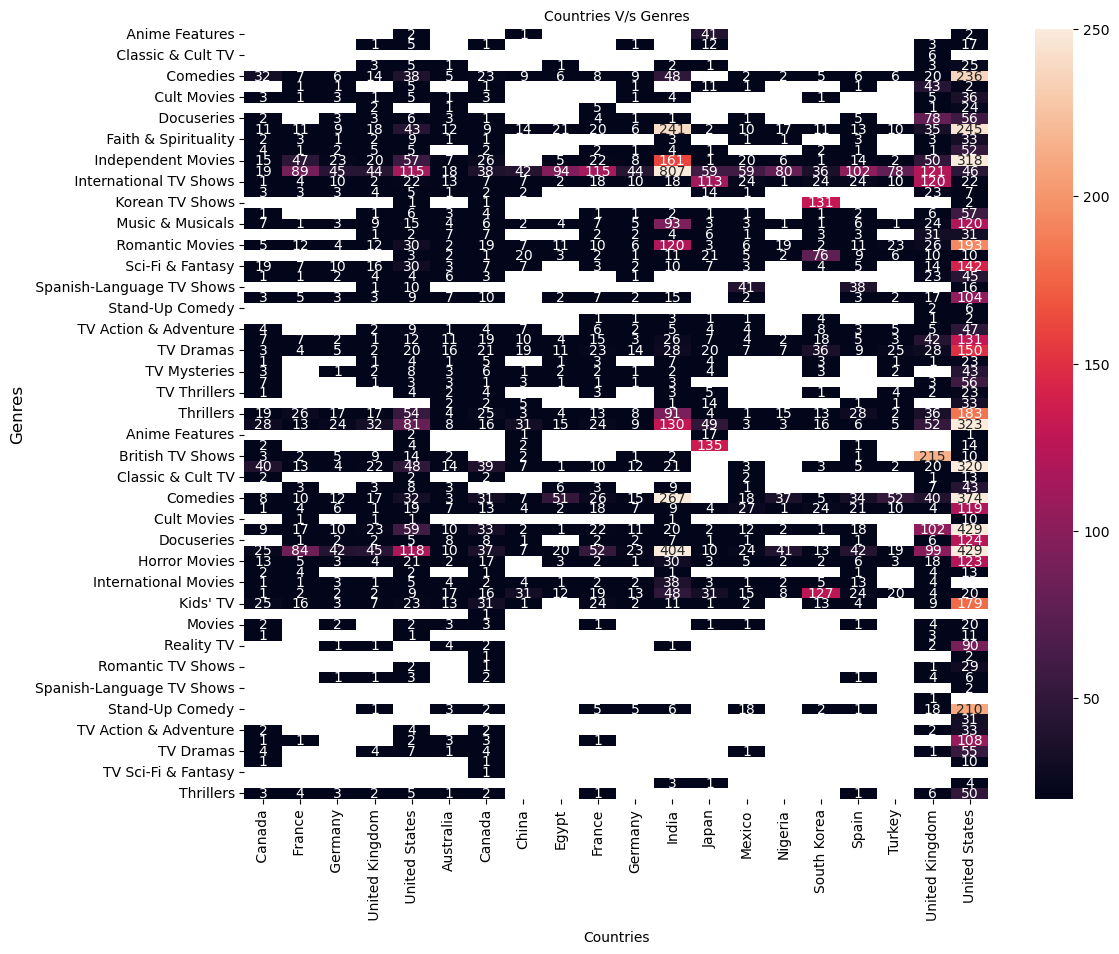

In [86]:
plt.figure(figsize = (12,10))
sns.heatmap(data = country_genre, annot = True, fmt = ".0f", vmin = 20, vmax = 250)
plt.xlabel('Countries' , fontsize = 10)
plt.ylabel('Genres' , fontsize = 12)
plt.title('Countries V/s Genres' , fontsize = 10)

 ## 6.Insights based on Non-Graphical and Visual Analysis

1. On Netflix around 70 % content is of Movies & and 30 % is of TV Shows.
2. Content on Netflix from 122 countries are present, in which United States is the highest contributor with almost 37 % of all content.
3. International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
4. Only United States have a good mix of almost all genres.
5. Indian Actors acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
6. Shorter duration movies have been popular in last 10 years.
7. Content uploading on the Netflix started form the year 2008, and it has very less content till 2014.
8. Drastic surge in the content uploaded on Netflix marks in 2015.
9. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic.
10. From 2018 drop in the movies content is seen, but rise in TV shows is observed. It shows the rise in popularity of TV shows in the recent years.
11. On Netflix around 4528 directors have their movies or tv shows on Netflix.
12. In the range 2005-2021 max shows.
13. 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
1

## 7. Business Insights

1. Netflix is currently serving mostly Mature audiences or Children with parental guidance. It have scope to cater other audiences as well such as familymen , Senior citizen , kids of various age etc.

2. The country like India , which is highly populous , has maximum content available only in three rating TV-MA, TV-14 , TV-PG. It is unlikely to serve below 14 age and above 35 year age group .

3. Netflix ha need to add demographic content of any country. Netflix can produce higher number of content in the perticular rating as per demographic of the country. 

4. Like in Indian Mythological content is highly popular. We can create such more country specific genres and It might also be liked acorss the world just like Japanese Anime.

5. Japan have only 3 rating of content largely served - TV-MA, TV-14 , TV-PG.Japan have high population of age above 60, and this can be served by increasing the content suitable for this age group.

6. Very limited genres are focussed in most of the countries except US. It seems the current available genres suits best for US and few countries but maximum countries need some more genres which are highly popular in the region.